## Import the required libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

## Importing the Dataset


The dataset can be found at 'https://www.kaggle.com/datasets/ashaychoudhary/anxiety-attack-factors-symptoms-and-severity'

In [2]:
dataset=pd.read_csv('anxiety_attack_dataset.csv')
dataset.head()

ID  Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0   1   56  Female      Other          9.6                           8.3   
1   2   46    Male    Teacher          6.4                           7.3   
2   3   32  Female     Doctor          6.9                           1.0   
3   4   60    Male     Doctor          9.2                           3.7   
4   5   25    Male    Student          9.2                           2.5   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
0                       175                                  6      No   
1                        97                                  6      No   
2                       467                                 14      No   
3                       471                                 16      No   
4                       364                                  2      No   

  Family History of Anxiety  Stress Level (1-10)  \
0                        No                    4   
1                        No                    3   
2                        No                    2   
3                       Yes                    6   
4                       Yes                    7   

   Heart Rate (bpm during attack)  Breathing Rate (breaths/min)  \
0                             145                            33   
1                             143                            18   
2                              60                            34   
3                              94                            19   
4                             152                            15   

   Sweating Level (1-5) Dizziness Medication  Therapy Sessions (per month)  \
0                     3        No         No                             4   
1                     5       Yes         No                             0   
2                     1        No         No                             7   
3                     1        No        Yes                             4   
4                     4        No        Yes                             0   

  Recent Major Life Event  Diet Quality (1-10)  \
0                     Yes                    9   
1                      No                    9   
2                     Yes                   10   
3                     Yes                    5   
4                      No                    1   

   Severity of Anxiety Attack (1-10)  
0                                 10  
1                                  8  
2                                  5  
3                                  8  
4                                  1

# 1. About the Data


Anxiety disorders are among the most common mental health conditions globally, affecting millions of individuals each year. Anxiety attacks, characterized by sudden episodes of intense fear and distress, can be triggered by various lifestyle, psychological, and physiological factors. This dataset contains 19 features that can be used to analyze and predict the severity of anxiety attacks.  
Key attributes include demographics (age, gender, occupation), lifestyle factors (sleep hours, physical activity, caffeine and alcohol consumption, smoking), psychological indicators (stress levels, family history of anxiety, recent major life events), and physiological responses (heart rate, breathing rate, sweating level, dizziness). Additionally, the dataset records coping mechanisms such as medication use and therapy sessions.  
Individuals with high stress levels or excessive caffeine intake may be at a greater risk of severe anxiety attacks, while sleep quality and physical activity could play a role in regulating anxiety symptoms. Early detection and intervention strategies, supported by data-driven analysis, can help manage anxiety more effectively.  
This data has been collected from individuals across different age groups and professions, providing valuable insights into the factors contributing to anxiety attacks.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [4]:
dataset.isna().sum()

ID                                   0
Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm during attack)       0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Severity of Anxiety Attack (1-10)    0
dtype: int64

We see that there is no missing values in our dataset, so we proceed with it

The 'ID' attribute will not have any useful information in our analysis, so we drop it

In [5]:
dataset=dataset.drop('ID',axis=1)

As, we saw in the in the dataset information that there are any attributes of the type 'object', which we need to encode. LabelEncoder has been used for this functionality

In [6]:
le=LabelEncoder()
cols=dataset.select_dtypes(include='object').columns

for col in cols:
    dataset[col]=le.fit_transform(dataset[col])

<Figure size 2000x2000 with 0 Axes>

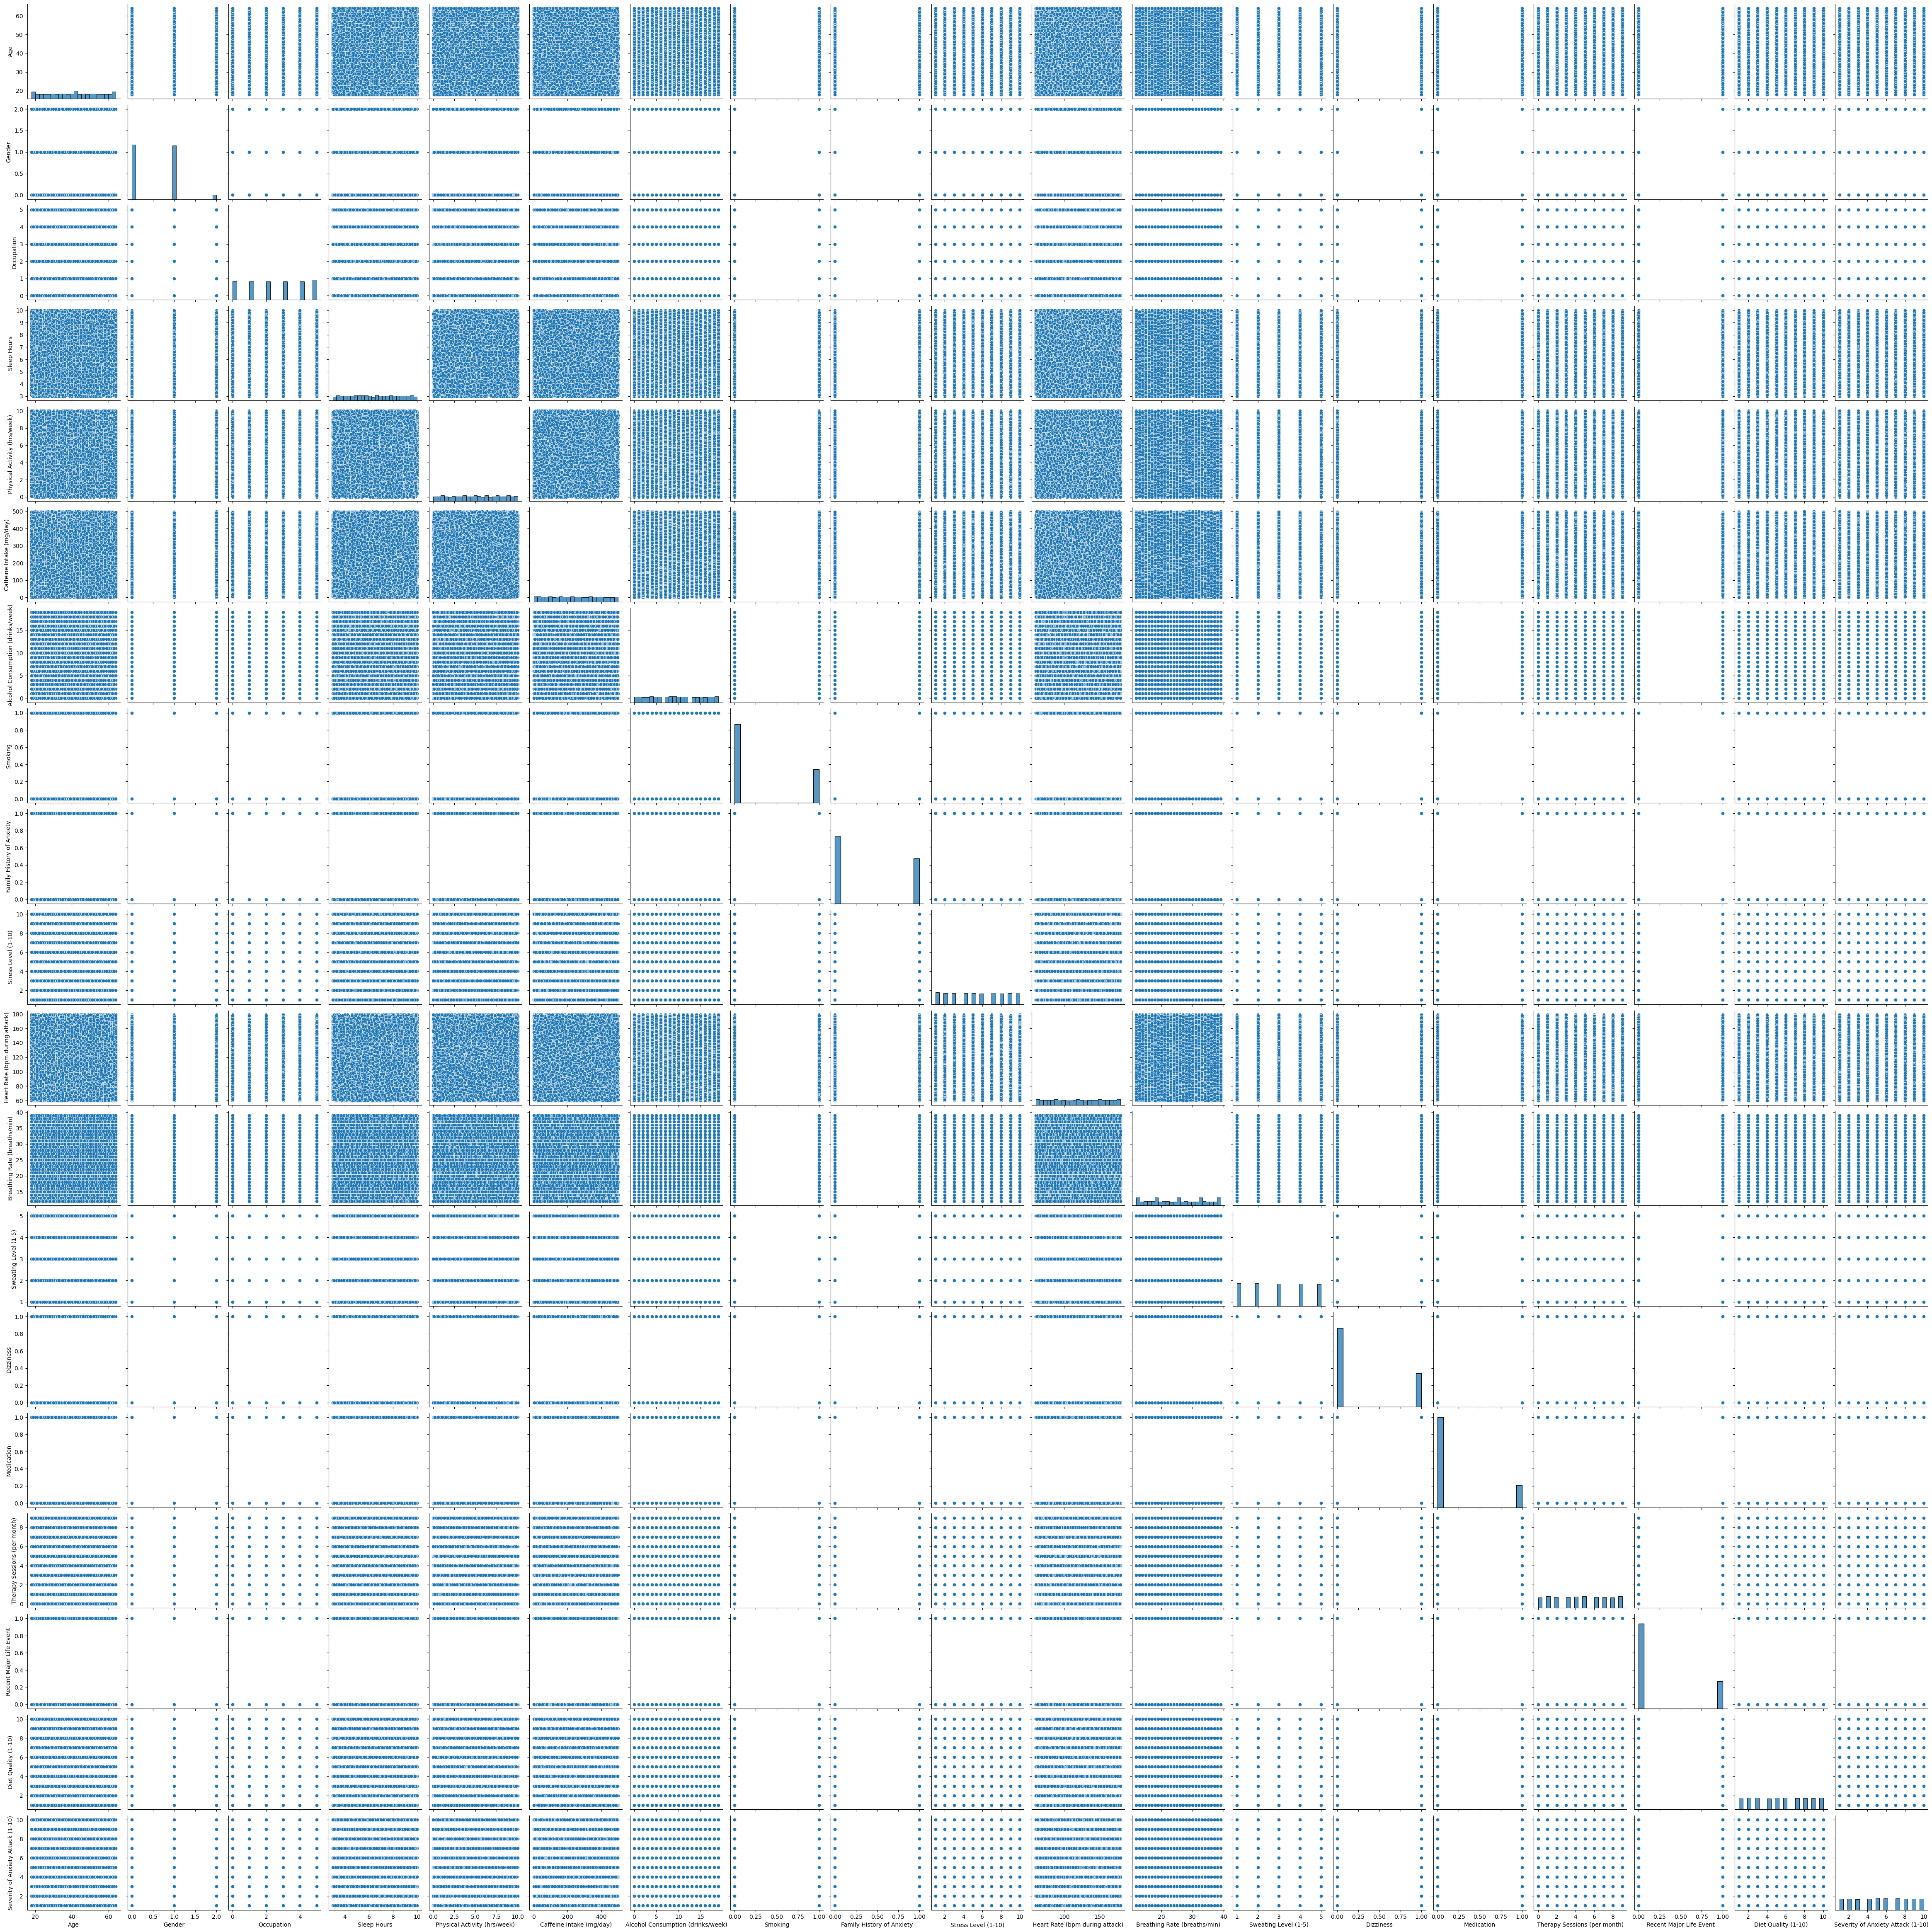

In [7]:
plt.figure(figsize=(20,20))
sns.pairplot(dataset)

<Axes: >

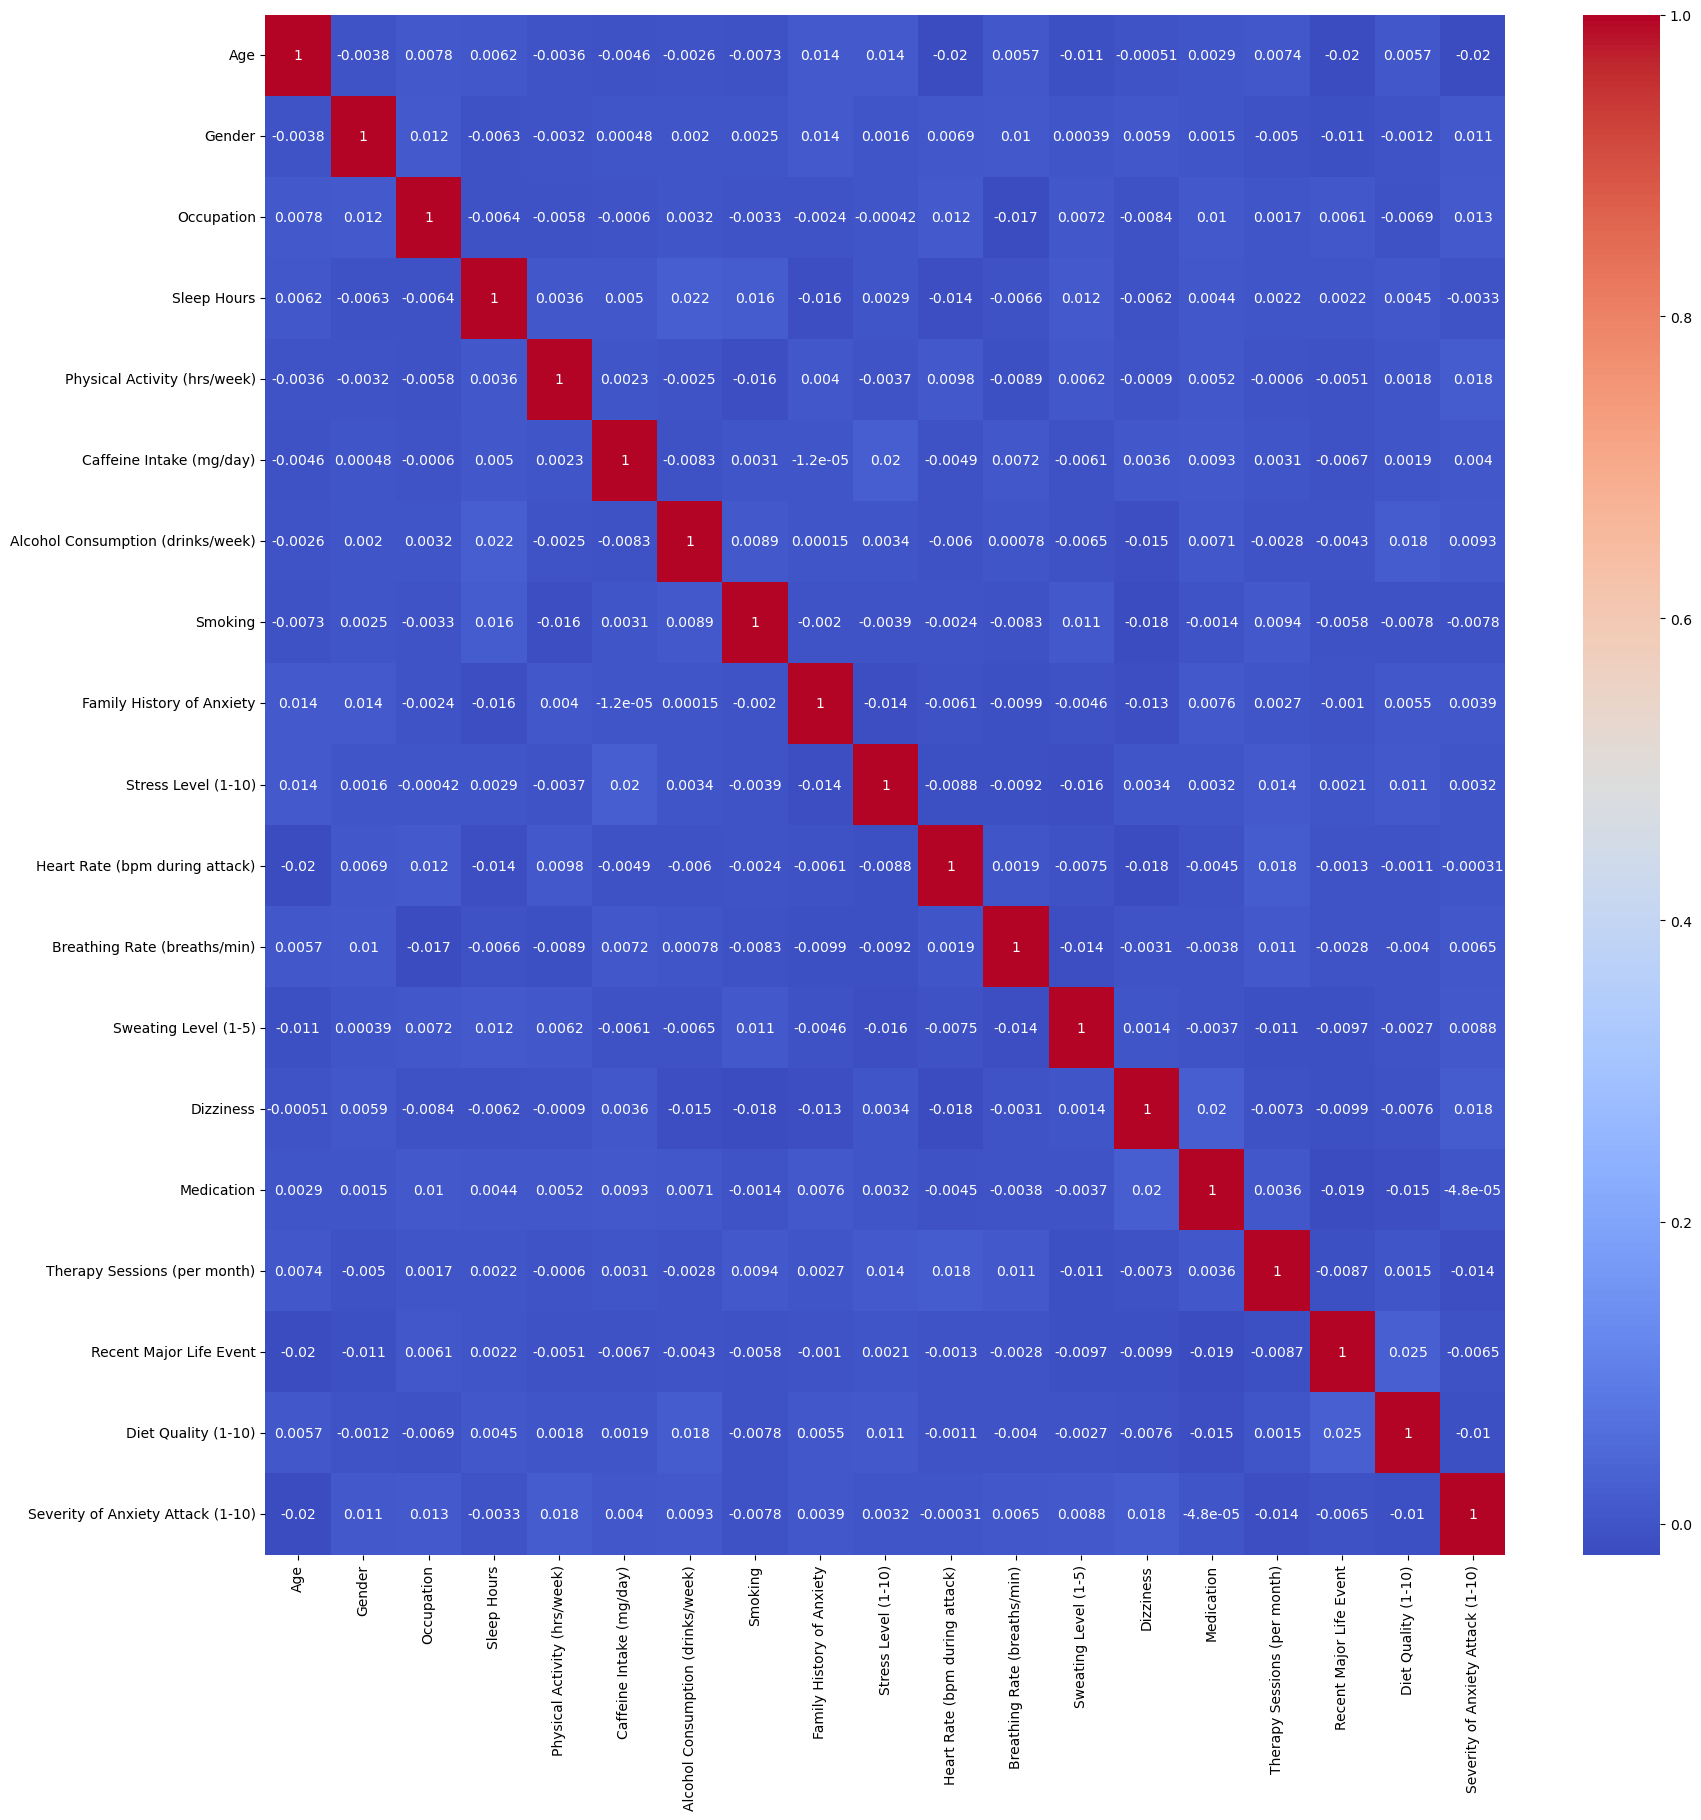

In [8]:
plt.figure(figsize=(20,20))

sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')

We find the most correlated pairs

In [9]:
corr_mat=dataset.corr()

for col in range(corr_mat.shape[0]):
    corr_mat.iloc[col][col]=0.0

corr_mat.abs().idxmax()

Age                                     Heart Rate (bpm during attack)
Gender                                       Family History of Anxiety
Occupation                                Breathing Rate (breaths/min)
Sleep Hours                          Alcohol Consumption (drinks/week)
Physical Activity (hrs/week)         Severity of Anxiety Attack (1-10)
Caffeine Intake (mg/day)                           Stress Level (1-10)
Alcohol Consumption (drinks/week)                          Sleep Hours
Smoking                                                      Dizziness
Family History of Anxiety                                  Sleep Hours
Stress Level (1-10)                           Caffeine Intake (mg/day)
Heart Rate (bpm during attack)                                     Age
Breathing Rate (breaths/min)                                Occupation
Sweating Level (1-5)                               Stress Level (1-10)
Dizziness                                                   Medication
Medica

We perform log transform, after examining the skew

In [10]:
skew=dataset.skew()
log_skew=skew.loc[skew>0.75]

for col in log_skew.index:
    dataset[col]=np.log1p(dataset[col])

Now, we scale the data

In [11]:
mm=MinMaxScaler()
for col in dataset.columns:
    dataset[col]=mm.fit_transform(dataset[[col]])

To reduce the dimensionality of this dataset, we perform Principle Component Analysis (PCA) on this dataset with n_components=2.


In [12]:
pca=PCA(n_components=2)

pca.fit(dataset)

PCA(n_components=2)

The two variances of the analysis are - 24% and 21%

In [13]:
pca.explained_variance_

array([0.24077381, 0.21375593])

The feature importance weights as per the PCA, will be as follows:

In [14]:
wt=np.abs(pca.components_).sum(axis=0)
feature_imp=pd.DataFrame({'features':dataset.columns,'imp':wt/wt.sum()})

feature_imp

features       imp
0                                 Age  0.007730
1                              Gender  0.005578
2                          Occupation  0.002230
3                         Sleep Hours  0.008800
4        Physical Activity (hrs/week)  0.006664
5            Caffeine Intake (mg/day)  0.001196
6   Alcohol Consumption (drinks/week)  0.007569
7                             Smoking  0.237977
8           Family History of Anxiety  0.365758
9                 Stress Level (1-10)  0.006838
10     Heart Rate (bpm during attack)  0.005415
11       Breathing Rate (breaths/min)  0.005012
12               Sweating Level (1-5)  0.005794
13                          Dizziness  0.281926
14                         Medication  0.024576
15       Therapy Sessions (per month)  0.005668
16            Recent Major Life Event  0.010810
17                Diet Quality (1-10)  0.002462
18  Severity of Anxiety Attack (1-10)  0.007997

<Axes: ylabel='Count'>

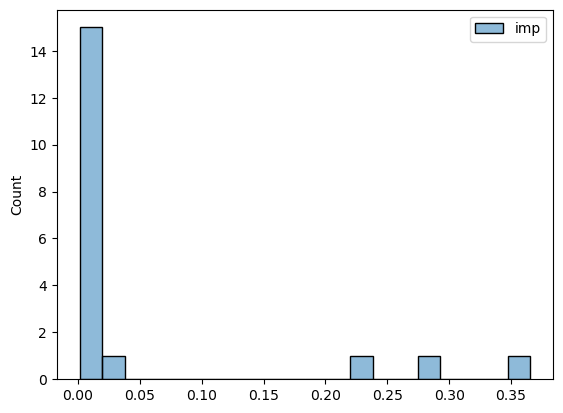

In [15]:
sns.histplot(feature_imp,bins=20)

In [16]:
pca_transformed=pca.fit_transform(dataset)

pca_inv=pca.inverse_transform(pca_transformed)
print('The Mean Squared Error of PCA is',mean_squared_error(dataset,pca_inv))

The Mean Squared Error of PCA is 0.09927596929211652


For further analaysis, only the top features 10 will be considered

In [17]:
pca_loading=pca.components_[0]

# Create a DataFrame for feature importance
feature_imp_1 = pd.DataFrame({'Feature': dataset.columns, 'PC1 Loading': pca_loading})

# Sort features by absolute contribution to PC1
top_10_features = feature_imp_1.reindex(feature_imp_1['PC1 Loading'].abs()
                                             .sort_values(ascending=False).index).head(10)

top_10_features

Feature  PC1 Loading
8        Family History of Anxiety     0.995518
13                       Dizziness    -0.087950
14                      Medication     0.014278
0                              Age     0.013603
1                           Gender     0.013044
9              Stress Level (1-10)    -0.012694
3                      Sleep Hours    -0.012562
11    Breathing Rate (breaths/min)    -0.010241
12            Sweating Level (1-5)    -0.007347
10  Heart Rate (bpm during attack)    -0.007309

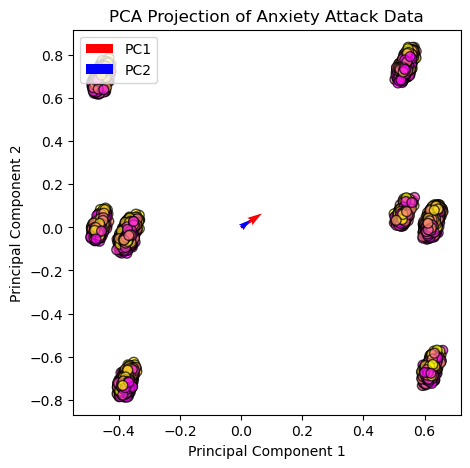

In [18]:
x_pca=pca.transform(dataset)

plt.figure(figsize=(5, 5))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=dataset['Severity of Anxiety Attack (1-10)'], cmap='spring', s=50, alpha=0.7, edgecolors='k')

# Compute origin
origin = np.mean(x_pca, axis=0)

# Plot Principal Component vectors
plt.quiver(origin[0], origin[1], pca.components_[0, 0], pca.components_[0, 1], angles='xy', scale_units='xy', scale=0.2, color='red', label='PC1')
plt.quiver(origin[0], origin[1], pca.components_[1, 0], pca.components_[1, 1], angles='xy', scale_units='xy', scale=0.2, color='blue', label='PC2')

plt.legend(loc='upper left')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Anxiety Attack Data')
plt.show()


This scatter plot gives us the visualisation of the two components, where the Severity of Anxiety Attack is used as the differentiating factor of the data instances

Thereby, extracting the top 10 features from the Principal Component 1, with maximum variance we make the final dataset we will use for further classifications.
The Principal Component 1 is been considered as it has the maximum variance as compared to the other one, so it will capture the data instances more accurately.

In [19]:
selected_features=top_10_features['Feature']

final_dataset=dataset[selected_features]
final_dataset['Severity of Anxiety Attack (1-10)']=dataset['Severity of Anxiety Attack (1-10)']
final_dataset.head()

C:\Users\TANISTHA\AppData\Local\Temp\ipykernel_15208\898631317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['Severity of Anxiety Attack (1-10)']=dataset['Severity of Anxiety Attack (1-10)']


Family History of Anxiety  Dizziness  Medication       Age  Gender  \
0                        0.0        0.0         0.0  0.826087     0.0   
1                        0.0        1.0         0.0  0.608696     0.5   
2                        0.0        0.0         0.0  0.304348     0.0   
3                        1.0        0.0         1.0  0.913043     0.5   
4                        1.0        0.0         1.0  0.152174     0.5   

   Stress Level (1-10)  Sleep Hours  Breathing Rate (breaths/min)  \
0             0.333333     0.942857                      0.777778   
1             0.222222     0.485714                      0.222222   
2             0.111111     0.557143                      0.814815   
3             0.555556     0.885714                      0.259259   
4             0.666667     0.885714                      0.111111   

   Sweating Level (1-5)  Heart Rate (bpm during attack)  \
0                  0.50                        0.714286   
1                  1.00                        0.697479   
2                  0.00                        0.000000   
3                  0.00                        0.285714   
4                  0.75                        0.773109   

   Severity of Anxiety Attack (1-10)  
0                           1.000000  
1                           0.777778  
2                           0.444444  
3                           0.777778  
4                           0.000000

In [20]:
final_dataset.shape

(12000, 11)

# 2. Objectives


The objective of applying unsupervised learning clustering to this dataset is to uncover hidden patterns and distinct groups among individuals experiencing anxiety attacks based on their lifestyle, psychological, and physiological attributes. By segmenting individuals into clusters, we can identify varying risk profiles, ranging from low to high susceptibility to severe anxiety attacks. These clusters may reveal important correlations between factors such as sleep quality, caffeine consumption, stress levels, and coping mechanisms, providing deeper insights into how different lifestyle choices and physiological responses contribute to anxiety. Additionally, clustering can help detect unique subgroups that exhibit similar anxiety triggers or coping strategies, enabling the development of personalized intervention plans. Understanding these patterns can support early detection efforts and inform more effective mental health strategies tailored to specific risk groups.

# 3. Classification Models

### 1. K-Means Clustering

The first model is of K-Means clustering. Here, we use a variety of cluster numbers from 1 to 10, and plot the inertia of each model to see the best suited number of clusters

C:\Users\TANISTHA\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TANISTHA\anaconda3\envs\ML\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\TANISTHA\anaconda3\envs\ML\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\TANISTHA\anaconda3\envs\ML\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\U

Text(0.5, 1.0, 'Elbow Method for K vs Inertia')

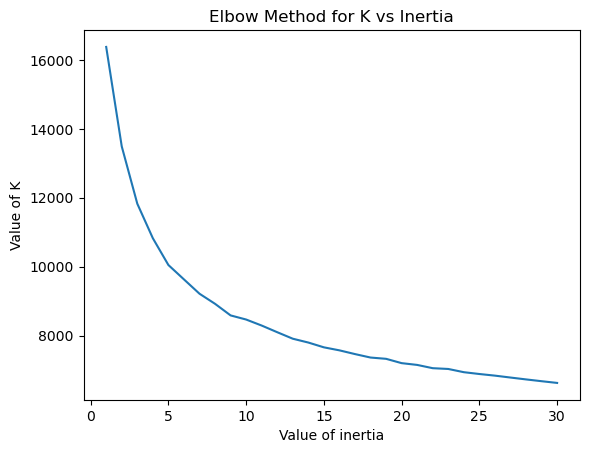

In [21]:
from sklearn.cluster import KMeans

inertia=[]
clusters=list(range(1,31))

for cluster in range (1,31):
    km=KMeans(n_clusters=cluster)
    km.fit(final_dataset)
    inertia.append(km.inertia_)

plt.plot(clusters,inertia)
plt.ylabel('Value of K')
plt.xlabel('Value of inertia')
plt.title('Elbow Method for K vs Inertia')

From this plot, we can see that from approximately 25 number of clusters, the inertia becomes minimum, and constant

In [22]:
dataset.columns

Index(['Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)',
       'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)',
       'Sweating Level (1-5)', 'Dizziness', 'Medication',
       'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)'],
      dtype='object')

In [23]:
kmeans=KMeans(n_clusters=25)
kmeans.fit(final_dataset)
kmeans_labels=kmeans.fit_predict(final_dataset)

print('Inertia of the model is',kmeans.inertia_)

C:\Users\TANISTHA\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TANISTHA\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia of the model is 6903.09114379223


### 2. Agglomerative Clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering

ag=AgglomerativeClustering(n_clusters=10, linkage='ward', compute_full_tree=True)
ag.fit(final_dataset)

ag_labels=ag.fit_predict(final_dataset)

The dendogram visualised will be 

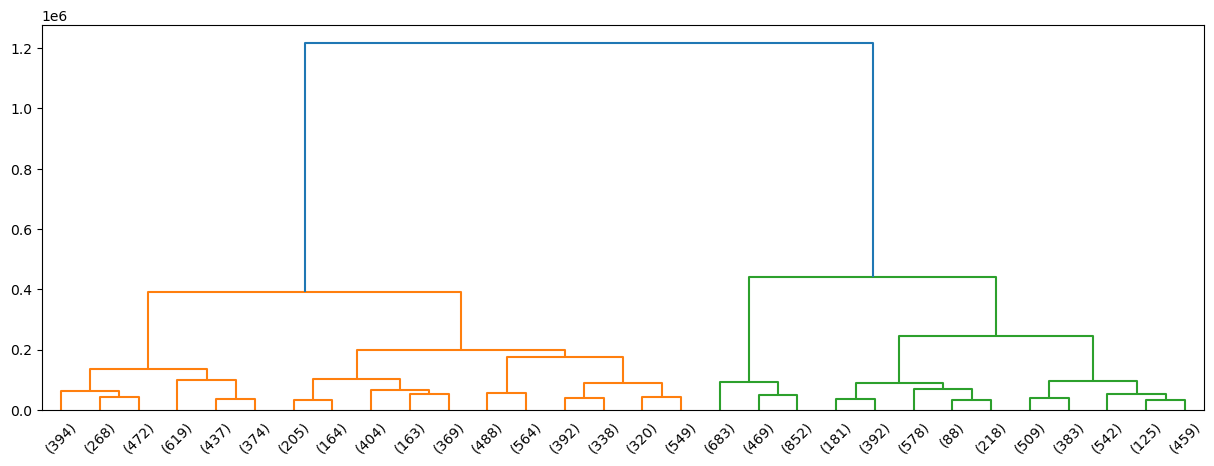

In [85]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))


den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax)

### 3. DBSCAN

In [28]:
from sklearn.cluster import DBSCAN

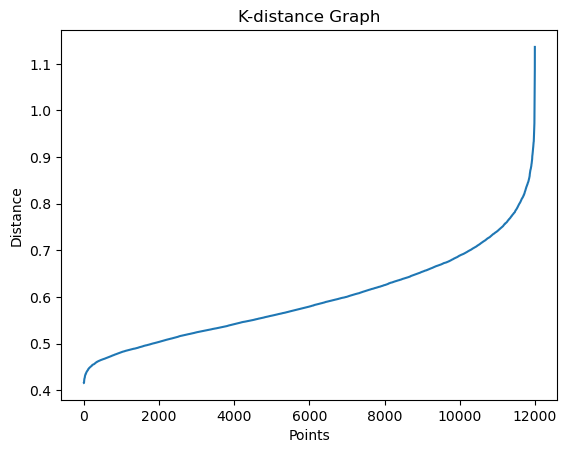

In [25]:
from sklearn.neighbors import NearestNeighbors

# Calculate pairwise distances using NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=20)  # Using min_samples value
neighbors_fit = neighbors.fit(final_dataset)
distances, indices = neighbors_fit.kneighbors(final_dataset)

# Sort distances to get the k-distance graph
distances = np.sort(distances[:, -1], axis=0)

# Plot k-distance graph
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()


This K-distance graph is used to find the appropriate eps for our DBSCAN algorithm. Here, the elbow represents the threshold where the dense regions transition to sparse regions. 

In [26]:
eps_value = np.percentile(distances, 98)

We take eps to be the 98th percentile because it excludes the noise, and ensures that it is quite large enough to inlcude the close points but small enough to prevent them from being clustered to a single cluster.

In [29]:
dbscan = DBSCAN(eps=eps_value, min_samples=20)
db_labels = dbscan.fit_predict(final_dataset)

In [30]:
unique_labels = set(db_labels)

### Plot of all accuracy

In [32]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(final_dataset, kmeans_labels)
agglomerative_silhouette = silhouette_score(final_dataset, ag_labels)

In [34]:
if len(unique_labels) > 1:  # Ensure there are multiple clusters
    valid_db_labels = db_labels[db_labels != -1]
    valid_db_data = final_dataset[db_labels != -1]

    if len(set(valid_db_labels)) > 1:  # At least 2 clusters must exist
        dbscan_silhouette = silhouette_score(valid_db_data, valid_db_labels)
        print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

DBSCAN Silhouette Score: 0.2353186044861123


In [35]:
cluster_quality={
    "Model": ["KMeans", "Agglomerative Clustering","DBSCAN"],
    "Silhouette Score": [kmeans_silhouette,agglomerative_silhouette,dbscan_silhouette]
}

df=pd.DataFrame(cluster_quality)
df.head()

Model  Silhouette Score
0                    KMeans          0.105612
1  Agglomerative Clustering          0.142391
2                    DBSCAN          0.235319

<Axes: xlabel='Model'>

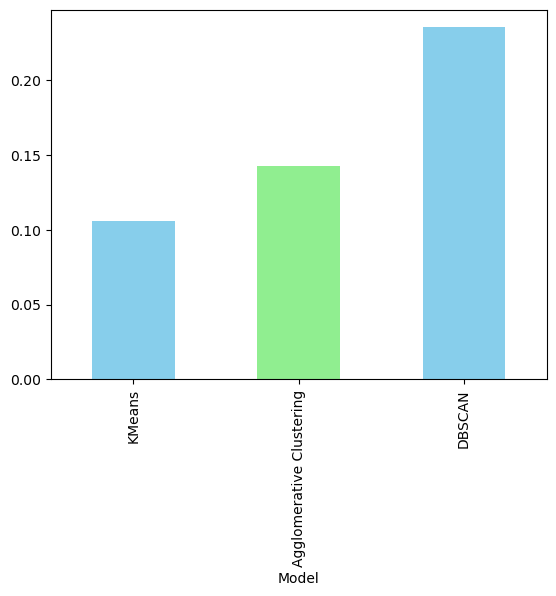

In [36]:
df.set_index('Model')['Silhouette Score'].plot(kind='bar', color=['skyblue', 'lightgreen'])

Therefore, from this plot we can conclude that the DBSCAN algorithm is the best for this dataset analysis

# 4. Insights and key findings


The objective of this analysis was to uncover hidden patterns and distinct groups among individuals experiencing anxiety attacks using unsupervised learning clustering techniques. The goal was to identify varying risk profiles based on lifestyle, psychological, and physiological attributes, which can help in early detection and personalized mental health strategies.

1. Data Preprocessing -
   The dataset contained no missing values across all 20 attributes. Several categorical variables, such as Gender, Smoking, Family History of Anxiety, Dizziness, Medication, and Recent Major Life Event, were label-encoded to convert them into numerical form for further computations.
To ensure uniformity across all features, MinMax Scaling was applied to normalize values between 0 and 1. This was particularly important for features like Caffeine Intake, Physical Activity, and Stress Level, which had varying numerical ranges. Additionally, highly skewed numerical features were transformed using a log transformation to bring them closer to a normal distribution.
To reduce dimensionality and retain the most important information, Principal Component Analysis (PCA) was performed, selecting top 10 features that contributed the most to variance in the dataset. These features were then used for further clustering.

2. Clustering Models - After data preprocessing, multiple unsupervised learning clustering algorithms were applied to segment individuals into distinct groups, which were KMeans clustering, Agglomerative clustering and DSCAN algorithm.
    To determine the best model, we calculated the silhouette scores of the three models and compared them by a bar plot. It was found that the DBSCAN was the best one.

K-Means Clustering: Achieved moderate performance but required pre-specifying the number of clusters.

Hierarchical Clustering: Provided interpretability but struggled with overlapping clusters.

DBSCAN: Outperformed other methods by effectively identifying meaningful clusters and isolating noise, making it the best choice for this dataset.

This clustering analysis successfully segmented individuals into distinct anxiety risk profiles, highlighting the impact of lifestyle and physiological factors on mental health. The findings emphasize that:

a) Sleep, stress levels, caffeine intake, and exercise play a crucial role in anxiety severity.

b) DBSCAN was the best clustering approach, effectively identifying high-risk individuals.

c) Different intervention strategies should be designed for each risk group to improve mental well-being.

# 5. Next Steps


Based on the key findings from the clustering analysis on anxiety attack severity, the following next steps can be taken to enhance the study and translate the insights into practical applications:

1. Expanding the dataset by incorporating more demographic, lifestyle, and psychological attributes.

2. Instead of relying on static values, tracking daily stress levels, sleep quality, and heart rate trends over time would help to gain deeper insights into progressive changes in anxiety severity.

3. Experimenting with a hybrid model that combines DBSCAN and K-Means, where DBSCAN detects outliers while K-Means effectively segments individuals into meaningful subgroups.